## Test individual sea level contributors

In [85]:
import numpy as np
import matplotlib.pyplot as plt
import importlib
import pandas as pd
from IPython.display import display
import sys
sys.path.append('../code')
import func_odyn as odyn
import func_misc as misc
import func_gic as gic
import func_gre as gre

In [61]:
importlib.reload(odyn)
importlib.reload(misc)

<module 'func_misc' from '/Users/dewi/Work/Project_ProbSLR/SLProj/code/func_misc.py'>

In [88]:
SCE = 'rcp85'
ROOT = '/Users/dewi/Work/Project_ProbSLR/Data_Proj/'
DIR_T = ROOT+'Data_AR5/Tglobal/'
DIR_IPCC = ROOT+'Data_AR5/Final_Projections/'
N = int(1e5)
start_date = 1980    # Start reading data
ys = 2006   # Starting point for the integration, if this is changed problems in functions
ye = 2100   # End year for computation
nb_y = ye-start_date+1       # Period where data needs to be read
nb_y2 = ye - ys +1           # Period of integration of the model
TIME       = np.arange( start_date, ye + 1 )
GAM = 1
GRE = 'IPCC'
NormD  = np.random.normal(0, 1, N)
Aoc = 3.6704e14              # Ocean Area (m2)
rho_w = 1e3                  # Water density (kg.m-3)
fac = -1e12 / (Aoc * rho_w)  # Convert Giga tones to m sea level
MOD = ["ACCESS1-0","BCC-CSM1-1","CanESM2","CNRM-CM5","CSIRO-Mk3-6-0","GFDL-ESM2G", \
    "GFDL-ESM2M","GISS-E2-R","HadGEM2-CC","HadGEM2-ES","inmcm4","IPSL-CM5A-LR", \
    "IPSL-CM5A-MR","MIROC5","MIROC-ESM-CHEM","MIROC-ESM","MPI-ESM-LR","MPI-ESM-MR", \
    "MRI-CGCM3","NorESM1-ME","NorESM1-M"]
 

### Test ocean dynamics function: odyn.odyn_glob_ipcc

(3, 100000, 95)


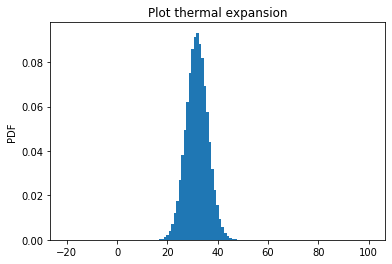

### Numbers for the total distribution ###
### Scenario rcp85 ###


,values
percentiles,
1.0,21.0
5.0,24.0
10.0,26.0
17.0,27.0
20.0,28.0
50.0,31.0
80.0,35.0
83.0,35.0
90.0,37.0


In [79]:
X_O = odyn.odyn_glob_ipcc(SCE, DIR_IPCC, N, nb_y2, GAM, NormD)
print(X_O.shape)

def comp_plot_dist(X_ens, lo, hi, title_in, SCE):
    nbin = int(hi - lo) 
    X_pdf, bins = np.histogram(X_ens, bins=nbin, range=(lo, hi), density=True)
    bin_centers = (bins[1:] + bins[:-1])/2

    plt.bar(bin_centers, X_pdf, width=1)
    plt.ylabel('PDF')
    plt.title(title_in)
    plt.show()
    
    print('### Numbers for the total distribution ###')
    Perc  = (1,5,10,17,20,50,80,83,90,95,99,99.5,99.9)
    print("### Scenario " + SCE + " ###")
    perc = misc.perc_df(X_pdf, Perc, bin_centers)
    display(perc)

comp_plot_dist(X_O[0,:,-1], -20.5, 100.5, 'Plot thermal expansion', SCE)
    

### Test the temperature projection function

(100000, 95)


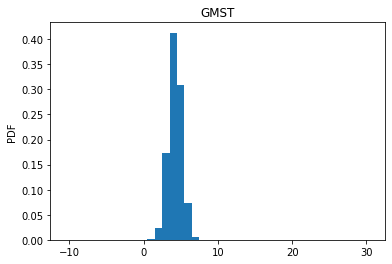

### Numbers for the total distribution ###
### Scenario rcp85 ###


,values
percentiles,
1.0,1.0
5.0,2.0
10.0,2.0
17.0,3.0
20.0,3.0
50.0,4.0
80.0,5.0
83.0,5.0
90.0,5.0


In [81]:
files = misc.temp_path_AR5(MOD, DIR_T, SCE)
TGLOB = misc.tglob_cmip5(False, files, SCE, nb_y, start_date, ye)
i_ys   = np.where(TIME == ys)[0][0]
TGLOBs = TGLOB[:,i_ys:]
Tref_gic = misc.Tref(1986, 2005, TGLOB, TIME)
#Build the distribution of global temperature for this process
Td_gic = misc.TempDist(TGLOBs, Tref_gic, GAM, NormD)
comp_plot_dist(Td_gic[:,-1], -10.5, 30.5, 'GMST', SCE)

### Test the glacier projection function

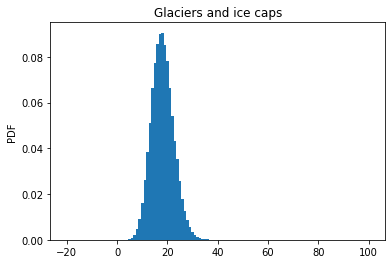

### Numbers for the total distribution ###
### Scenario rcp85 ###


,values
percentiles,
1.0,8.0
5.0,11.0
10.0,12.0
17.0,13.0
20.0,14.0
50.0,17.0
80.0,21.0
83.0,22.0
90.0,23.0


In [82]:
NormDs  = np.random.normal(0, 1, N)   # This distribution is then kept for correlation
X_gic = gic.gic_ar5(Td_gic, NormDs)

comp_plot_dist(X_gic[:,-1], -20.5, 100.5, 'Glaciers and ice caps', SCE)


### Test the Greenland SMB function

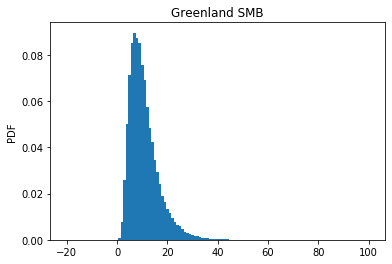

### Numbers for the total distribution ###
### Scenario rcp85 ###


,values
percentiles,
1.0,2.0
5.0,3.0
10.0,4.0
17.0,5.0
20.0,6.0
50.0,9.0
80.0,14.0
83.0,15.0
90.0,18.0


In [90]:
Tref_g   = misc.Tref(1980, 1999, TGLOB, TIME)   # Greenland SMB
Td_g  = misc.TempDist(TGLOBs, Tref_g, GAM, NormD)
NormDl = np.random.normal(0, 1, N)
X_gsmb = gre.fett13(fac, Td_g, NormDl, GRE)
comp_plot_dist(X_gsmb[:,-1], -20.5, 100.5, 'Greenland SMB', SCE)

In [47]:
AR5_df = pd.read_csv('../ref_results/SLR_AR5_2100', sep=';', comment='#') # , header=1
AR5_df = AR5_df.set_index('Processes')
AR5_df


,A1B med,A1B 5th,A1B 95th,RCP2.6 med,RCP2.6 5th,RCP2.6 95th,RCP4.5 med,RCP4.5 5th,RCP4.5 95th,RCP6.0 med,RCP6.0 5th,RCP6.0 95th,RCP8.5 med,RCP8.5 5th,RCP8.5 95th
Processes,,,,,,,,,,,,,,,
Thermal expansion,0.24,0.18,0.30,0.15,0.11,0.20,0.20,0.15,0.25,0.22,0.17,0.27,0.32,0.25,0.39
Glaciers,0.16,0.09,0.23,0.11,0.05,0.17,0.13,0.07,0.20,0.14,0.07,0.20,0.18,0.10,0.26
Greenland Ice Sheet SMB,0.07,0.03,0.15,0.03,0.01,0.08,0.05,0.02,0.11,0.05,0.02,0.12,0.10,0.04,0.22
Antarctic Ice Sheet SMB,–0.04,–0.07,–0.01,–0.02,–0.05,–0.00,–0.03,–0.06,–0.01,–0.03,–0.06,–0.01,–0.05,–0.09,–0.02
Greenland Ice Sheet Rapid Dynamics,0.04,0.01,0.06,0.04,0.01,0.06,0.04,0.01,0.06,0.04,0.01,0.06,0.05,0.02,0.09
Antarctic Ice Sheet Rapid Dynamics,0.08,–0.02,0.19,0.08,–0.02,0.19,0.08,–0.02,0.19,0.08,–0.02,0.19,0.08,–0.02,0.19
Land Water Storage,0.05,–0.01,0.11,0.05,–0.01,0.11,0.05,–0.01,0.11,0.05,–0.01,0.11,0.05,–0.01,0.11
Sea Level Rise,0.60,0.42,0.80,0.44,0.28,0.61,0.53,0.36,0.71,0.55,0.38,0.73,0.74,0.52,0.98
Greenland Ice Sheet,0.11,0.07,0.19,0.08,0.04,0.12,0.09,0.05,0.16,0.09,0.06,0.16,0.15,0.09,0.28
